In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/home/ngrav/project/')
from wearables.scripts import utils as wearutils
from wearables.scripts import data_v42 as weardata
from wearables.scripts import models_v42 as wearmodels
from wearables.scripts import train_v42 as weartrain
from wearables.scripts import eval_v42 as weareval

import torch

import numpy as np

In [2]:
# model
# net = wearmodels.InceptionTime(2, 1, bottleneck=8, kernel_size=5,
#                                nb_filters=512, residual=True, nb_layers=16)
net = wearmodels.CNN(2, 10080, 1, [(1, 32), (1, 64), (1, 128), (3, 256)])

## double chk size
# print(wearutils.estimate_model_mem(net))

In [3]:
trainer = weartrain.train(net, 
                          trial=1,
                          load_splits=None,
                          n_epochs=5000,
                          batch_size=32,
                          patience=100,
                          lr=1e-6,
                          device=torch.device('cuda:0'))

In [4]:
trainer.fit()


Starting training after 5-s of setup...


/home/ngrav/miniconda3/envs/wearables/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0	<loss>=474.4168	<loss_val>=485.4352	in 12-s	elapsed: 0.3-min
Epoch 1	<loss>=463.3025	<loss_val>=470.4131	in 10-s	elapsed: 0.5-min
Epoch 2	<loss>=446.1235	<loss_val>=448.8348	in 10-s	elapsed: 0.6-min
Epoch 3	<loss>=422.9642	<loss_val>=420.4926	in 10-s	elapsed: 0.8-min
Epoch 4	<loss>=391.0609	<loss_val>=381.1808	in 10-s	elapsed: 1.0-min
Epoch 5	<loss>=351.4994	<loss_val>=333.7444	in 10-s	elapsed: 1.1-min
Epoch 6	<loss>=301.8520	<loss_val>=278.7549	in 10-s	elapsed: 1.3-min
Epoch 7	<loss>=248.4720	<loss_val>=221.7179	in 10-s	elapsed: 1.5-min
Epoch 8	<loss>=197.2467	<loss_val>=171.2675	in 9-s	elapsed: 1.6-min
Epoch 9	<loss>=156.9310	<loss_val>=135.1939	in 9-s	elapsed: 1.8-min
Epoch 10	<loss>=131.2316	<loss_val>=116.6514	in 10-s	elapsed: 1.9-min
Epoch 11	<loss>=118.8046	<loss_val>=110.1818	in 9-s	elapsed: 2.1-min
Epoch 12	<loss>=116.5141	<loss_val>=108.1941	in 10-s	elapsed: 2.2-min
Epoch 13	<loss>=115.0706	<loss_val>=107.2655	in 10-s	elapsed: 2.4-min
Epoch 14	<loss>=113.4907	<loss_va

In [5]:
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

In [ ]:
# with L1 and MSE
trainer = weartrain.train(net, exp='CNNMSEl1',
                          criterion=weartrain.MSEL1(), 
                          trial=1,
                          load_splits=None,
                          n_epochs=5000,
                          batch_size=32,
                          lr=1e-6,
                          device=torch.device('cuda:0'))
trainer.fit()

In [ ]:
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

In [11]:
trainer = weartrain.train(net, 
                          exp='CNNL2',
                          trial=2,
                          lambda_l2=0.001,
                          load_splits=None,
                          n_epochs=5000,
                          batch_size=32,
                          patience=100,
                          lr=1e-6,
                          device=torch.device('cuda:0'))
trainer.fit()


Starting training after 2-s of setup...
Epoch 0	<loss>=87.0664	<loss_val>=83.6043	in 10-s	elapsed: 0.2-min
Epoch 1	<loss>=86.4357	<loss_val>=83.3111	in 10-s	elapsed: 0.4-min
Epoch 2	<loss>=86.1796	<loss_val>=83.3659	in 11-s	elapsed: 0.6-min
Epoch 3	<loss>=86.5909	<loss_val>=82.7045	in 11-s	elapsed: 0.7-min
Epoch 4	<loss>=88.0742	<loss_val>=85.0058	in 10-s	elapsed: 0.9-min
Epoch 5	<loss>=87.7408	<loss_val>=84.0685	in 10-s	elapsed: 1.1-min
Epoch 6	<loss>=88.2576	<loss_val>=83.6451	in 10-s	elapsed: 1.2-min
Epoch 7	<loss>=87.6194	<loss_val>=83.8063	in 10-s	elapsed: 1.4-min
Epoch 8	<loss>=85.9546	<loss_val>=84.2467	in 10-s	elapsed: 1.6-min
Epoch 9	<loss>=85.6937	<loss_val>=85.4375	in 10-s	elapsed: 1.7-min
Epoch 10	<loss>=87.3011	<loss_val>=83.9036	in 10-s	elapsed: 1.9-min
Epoch 11	<loss>=87.0735	<loss_val>=84.4203	in 10-s	elapsed: 2.0-min
Epoch 12	<loss>=86.5185	<loss_val>=85.6452	in 10-s	elapsed: 2.2-min
Epoch 13	<loss>=88.1200	<loss_val>=83.4708	in 10-s	elapsed: 2.4-min
Epoch 14	<loss>=8

In [12]:
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

# dev

In [42]:
str(nn.MSELoss().__class__)

"<class 'torch.nn.modules.loss.MSELoss'>"

In [8]:
import torch
import torch.nn as nn

In [38]:
class MSEL1(nn.Module):
    def __init__(self, lambda_l1=0.001):
        super().__init__()
        self.lambda_l1 = lambda_l1
        self.MSE = nn.MSELoss()
        
    def L1(self, params):
        return sum(p.abs().sum() for p in params)
    
    def forward(self, output, target, params):
        return self.MSE(output, target) + self.lambda_l1*self.L1(params)
        

In [40]:
MSEL1(lambda_l1=0)(evaluation.yhat, evaluation.y, net.parameters())

tensor(152.4242, grad_fn=<AddBackward0>)

In [31]:
params = net.parameters()
count = 0
for i, p in enumerate(params):
    count += p.abs().sum()

In [32]:
count

tensor(79582.5000, grad_fn=<AddBackward0>)

In [11]:
# test
device = torch.device('cpu')
trainer.model.to(device)
trainer.model.eval()
if True: # switch for set to analyze
    dataloader = trainer.data.test_dl

for i, batch in enumerate(dataloader):
    x, y, idx = batch['x'], batch['y'], batch['id']

    output = trainer.model(x)
    if trainer.data.tasktype == 'regression':
        output = output.squeeze()
    if i==0:
        y_total = y.detach()
        idx_total = idx
        yhat_total = output.detach()
    else:
        y_total = torch.cat((y_total, y.detach()), dim=0)
        idx_total = idx_total + idx
        yhat_total = torch.cat((yhat_total, output.detach()), dim=0)
loss_test = trainer.criterion(yhat_total, y_total).item()

In [12]:
loss_test

88.0103988647461

In [18]:
(y_total - yhat_total).abs().mean().item()

8.121149063110352

In [19]:
from scipy.stats import spearmanr

In [21]:
spearmanr(y_total, yhat_total)

SpearmanrResult(correlation=0.3109129103839624, pvalue=2.995345883681129e-18)

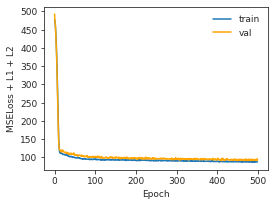

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(trainer.loss)), trainer.loss, label='train')
ax.plot(np.arange(len(trainer.loss_val)), trainer.loss_val, label='val', color='orange')
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('MSELoss + L1 + L2')
fig.savefig('/home/ngrav/project/wearables/results/CNN_GA_0_losscurves.png')

In [29]:
trainer.model

CNN(
  (vgg): Sequential(
    (0): Sequential(
      (0): Conv1d(2, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
 

In [33]:
trainer.model.to(torch.device('cuda:0'))

CNN(
  (vgg): Sequential(
    (0): Sequential(
      (0): Conv1d(2, 32, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
 

In [34]:
trainer.model = trainer.model.to(torch.device('cuda:0'))

In [37]:
torch.save(trainer.model.state_dict(), '/home/ngrav/scratch/test.pkl')

In [38]:
trainer.model.load_state_dict(torch.load('/home/ngrav/scratch/test.pkl', map_location=torch.device('cpu')))

<All keys matched successfully>

In [77]:
import importlib
importlib.reload(weareval)

<module 'wearables.scripts.eval_v42' from '/home/ngrav/project/wearables/scripts/eval_v42.py'>

In [78]:
from wearables.scripts import eval_v42 as weareval
evaluation = weareval.eval_trained(trainer, 
                                   out_file='/home/ngrav/project/wearables/results/eval_test_v42.csv')

In [65]:
evaluation.results

,record_id,age_enroll,marital,gestage_by,insur,ethnicity,race,bmi_1vis,prior_ptb_all,fullterm_births,...,edinb4_1trim,edinb5_1trim,edinb6_1trim,edinb7_1trim,edinb8_1trim,edinb9_1trim,edinb10_1trim,id,y,yhat
0,1620.0,34.0,0.0,4.0,3.0,0.0,1.0,29.280067,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1620_8,tensor(8.),tensor(19.4009)
1,2174.0,22.0,1.0,2.0,3.0,0.0,0.0,28.575377,0.0,1.0,...,3.0,3.0,3.0,1.0,1.0,1.0,1.0,2174_24,tensor(24.),tensor(21.9032)
2,1126.0,18.0,0.0,1.0,1.0,0.0,0.0,54.132374,0.0,0.0,...,3.0,2.0,3.0,3.0,2.0,3.0,1.0,1126_10,tensor(10.),tensor(19.1752)
3,2278.0,29.0,1.0,2.0,3.0,0.0,0.0,23.683273,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2278_10,tensor(10.),tensor(17.8081)
4,2311.0,18.0,0.0,2.0,3.0,0.0,1.0,35.355957,0.0,0.0,...,2.0,3.0,3.0,3.0,2.0,2.0,1.0,2311_22,tensor(22.),tensor(21.0674)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,2488.0,36.0,0.0,2.0,3.0,0.0,0.0,37.115395,0.0,1.0,...,4.0,1.0,3.0,1.0,2.0,2.0,1.0,2488_34,tensor(34.),tensor(20.4559)
745,1319.0,32.0,0.0,1.0,1.0,0.0,1.0,37.401787,0.0,0.0,...,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1319_10,tensor(10.),tensor(19.5485)
746,1774.0,28.0,1.0,3.0,3.0,0.0,1.0,21.298285,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1774_7,tensor(7.),tensor(21.5935)
747,2528.0,32.0,1.0,2.0,3.0,0.0,0.0,19.222656,0.0,0.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2528_22,tensor(22.),tensor(23.7955)


In [67]:
trainer.exp

'CNN_GA'